In [1]:
import pandas as pd


In [2]:
dataset=pd.read_csv('insurance_pre.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [6]:
dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)

In [7]:
dataset.head()


,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [9]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [10]:
indep=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [11]:
dep=dataset[['charges']]

In [12]:
indep.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [13]:
dep.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.30,random_state=0)

In [133]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='auto')
regressor=regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


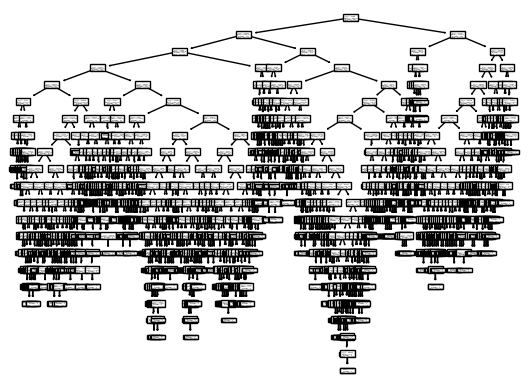

In [138]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [135]:
y_pred=regressor.predict(x_test)

In [136]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [137]:
r_score


0.6446755291447182